In [46]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

from scipy.sparse import hstack, csr_matrix, vstack
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from tqdm import *

import wordcloud

import gc

import lightgbm as lgb


In [48]:
import re

In [8]:
df = pd.read_csv('data_in_dataframe.csv', sep="\t")
del df['Unnamed: 0']

In [9]:
df.head()

,sentence,type,point
0,Áo bao đẹp ạ!!,POS,5
1,Tuyệt vời !,POS,5
2,2day ao khong giong trong.,NEG,1
3,"Mùi thơm,bôi lên da mềm da.",POS,5
4,"Vải đẹp, dày dặn.",POS,5


In [12]:
df['point'].value_counts()

5    13286
4     6807
3     4698
1     3529
2     3140
Name: point, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f631d06d510>]],
      dtype=object)

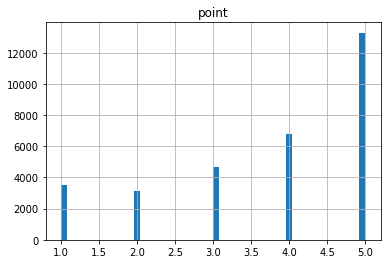

In [14]:
df.hist(column='point', bins = 50)

In [15]:
df.columns

Index(['sentence', 'type', 'point'], dtype='object')

In [20]:
X = df[['sentence']].values

In [21]:
X.shape

(31460, 1)

In [34]:
y = df['point'].values

In [35]:
y

array([5, 5, 1, ..., 5, 4, 5])

In [36]:
y.shape

(31460,)

In [39]:
X[:5]

array([['Áo bao đẹp ạ!!'],
       ['Tuyệt vời !'],
       ['2day ao khong giong trong.'],
       ['Mùi thơm,bôi lên da mềm da.'],
       ['Vải đẹp, dày dặn.']], dtype=object)

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (25168, 1) (25168,)
Test set: (6292, 1) (6292,)


In [58]:
# test = df.loc[df['point'] >= 4]

In [59]:
# test